# Predicting The Rent for Brazilian Apartments

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import pickle

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import LabelEncoder

# 1. Data Collection

In [2]:
df = pd.read_csv("data/houses_to_rent.csv")

In [3]:
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


# 2. Data Cleaning

In [4]:
df.shape

(6080, 14)

In [5]:
# drop Unnamed column
df.drop(["Unnamed: 0"], axis = 1, inplace=True)

In [6]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [7]:
df.shape

(6080, 13)

In [8]:
df.describe()

,city,area,rooms,bathroom,parking spaces
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250
std,0.343535,375.559485,1.129665,1.438860,1.611909
min,0.000000,10.000000,1.000000,1.000000,0.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000
50%,1.000000,100.000000,3.000000,2.000000,1.000000
75%,1.000000,200.000000,3.000000,3.000000,2.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000


In [9]:
# Replacing dash with null in columns
df.replace("-", np.nan, inplace=True)

In [10]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,NaN,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,NaN,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [11]:
# Removing string signs next to numbers
df.replace({'R': '','\$': '', ',': ''}, regex=True, inplace=True)

In [12]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,NaN,acept,furnished,0,8000,1000,121,9121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11,1493
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89,12680
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16,2116
4,1,19,1,1,0,NaN,not acept,not furnished,0,1200,41,16,1257


In [13]:
df.dtypes

city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

In [14]:
# Getting object dtype columns
object_df = df.select_dtypes(include=['object'])
object_df

,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,NaN,acept,furnished,0,8000,1000,121,9121
1,10,acept,not furnished,540,820,122,11,1493
2,3,acept,furnished,4172,7000,1417,89,12680
3,12,acept,not furnished,700,1250,150,16,2116
4,NaN,not acept,not furnished,0,1200,41,16,1257
...,...,...,...,...,...,...,...,...
6075,2,acept,not furnished,420,1150,0,15,1585
6076,16,not acept,furnished,768,2900,63,37,3768
6077,13,acept,not furnished,250,950,42,13,1255
6078,NaN,not acept,not furnished,0,3500,250,53,3803


In [15]:
# Convert columns to numeric
df[['rent amount','floor', 'fire insurance', 'total']] = df[['rent amount', 'floor', 'fire insurance', 'total']].apply(pd.to_numeric)

In [16]:
df.dtypes

city                int64
area                int64
rooms               int64
bathroom            int64
parking spaces      int64
floor             float64
animal             object
furniture          object
hoa                object
rent amount         int64
property tax       object
fire insurance      int64
total               int64
dtype: object

In [17]:
# Convert columns to numeric using errors='coerce' since columns contain strings
df['hoa'] = pd.to_numeric(df['hoa'], errors='coerce')
df['property tax'] = pd.to_numeric(df['property tax'], errors='coerce')

In [18]:
df.dtypes

city                int64
area                int64
rooms               int64
bathroom            int64
parking spaces      int64
floor             float64
animal             object
furniture          object
hoa               float64
rent amount         int64
property tax      float64
fire insurance      int64
total               int64
dtype: object

In [19]:
# Convert columns to categorical
le = LabelEncoder()

# apply le on categorical feature columns
df[['animal', 'furniture']] = df[['animal', 'furniture']].apply(lambda col: le.fit_transform(col))

In [20]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,NaN,0,0,0.0,8000,1000.0,121,9121
1,0,64,2,1,1,10.0,0,1,540.0,820,122.0,11,1493
2,1,443,5,5,4,3.0,0,0,4172.0,7000,1417.0,89,12680
3,1,73,2,2,1,12.0,0,1,700.0,1250,150.0,16,2116
4,1,19,1,1,0,NaN,1,1,0.0,1200,41.0,16,1257


In [21]:
df.dtypes

city                int64
area                int64
rooms               int64
bathroom            int64
parking spaces      int64
floor             float64
animal              int32
furniture           int32
hoa               float64
rent amount         int64
property tax      float64
fire insurance      int64
total               int64
dtype: object

In [22]:
df.isna().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor             1555
animal               0
furniture            0
hoa                202
rent amount          0
property tax        27
fire insurance       0
total                0
dtype: int64

In [23]:
# Filling nulls in "floor" column with the median
median_value = df['floor'].median()
df['floor'] = df['floor'].fillna(median_value)

In [24]:
df['floor'] = df['floor'].astype(int)

In [25]:
df['floor'].dtype

dtype('int32')

In [26]:
df['floor'].value_counts()

6     1861
1      573
3      401
2      379
4      319
5      314
8      291
7      287
9      224
10     213
11     193
12     179
13     143
14     141
15     107
16      89
17      73
18      69
19      47
20      36
21      30
23      26
25      23
22      21
24      11
27       7
28       6
26       6
29       4
99       1
32       1
68       1
51       1
31       1
35       1
85       1
Name: floor, dtype: int64

In [27]:
df.isna().sum()

city                0
area                0
rooms               0
bathroom            0
parking spaces      0
floor               0
animal              0
furniture           0
hoa               202
rent amount         0
property tax       27
fire insurance      0
total               0
dtype: int64

In [28]:
# filling nulls in "hoa" and "property tax" columns with the mean
mean_value = df[["hoa", "property tax"]].mean()
df[["hoa", "property tax"]] = df[["hoa", "property tax"]].fillna(mean_value)

In [29]:
df.isna().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

In [30]:
df.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000
mean,0.863322,151.143914,2.492599,2.341612,1.756250,7.206743,0.232566,0.739803,1125.830725,4395.844408,492.520568,58.204276,6033.194572
std,0.343535,375.559485,1.129665,1.438860,1.611909,5.243834,0.422502,0.438778,3976.240698,3576.668946,6212.478211,49.313441,8751.347700
min,0.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1.000000,58.000000,2.000000,1.000000,1.000000,4.000000,0.000000,0.000000,260.000000,1800.000000,34.000000,23.000000,2451.500000
50%,1.000000,100.000000,3.000000,2.000000,1.000000,6.000000,0.000000,1.000000,710.000000,3111.000000,150.000000,41.000000,4128.500000
75%,1.000000,200.000000,3.000000,3.000000,2.000000,9.000000,0.000000,1.000000,1436.000000,5952.500000,459.000000,77.000000,8074.000000
max,1.000000,24606.000000,10.000000,10.000000,12.000000,99.000000,1.000000,1.000000,220000.000000,45000.000000,366300.000000,677.000000,372700.000000


In [31]:
df.shape

(6080, 13)

In [32]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,6,0,0,0.0,8000,1000.0,121,9121
1,0,64,2,1,1,10,0,1,540.0,820,122.0,11,1493
2,1,443,5,5,4,3,0,0,4172.0,7000,1417.0,89,12680
3,1,73,2,2,1,12,0,1,700.0,1250,150.0,16,2116
4,1,19,1,1,0,6,1,1,0.0,1200,41.0,16,1257


# 3. Exploratory Data Analysis

### 3.1. Categorical Features

### 3.1.1. City

### ANALYSING CITY FEATURE

In [33]:
df["city"].value_counts()

1    5249
0     831
Name: city, dtype: int64

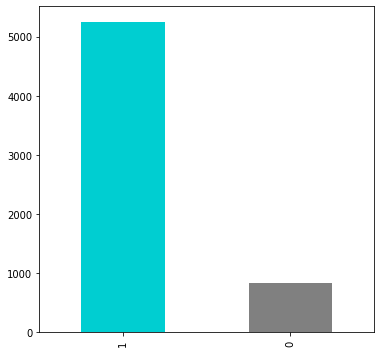

In [34]:
df["city"].value_counts().plot(kind="bar", figsize=(6, 6), color=["darkTurquoise", "grey"]);

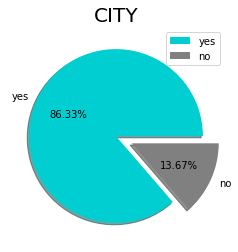

In [35]:
size = [5249,831]
labels = ['yes', 'no']
colors = ['darkTurquoise', 'grey']
explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('CITY', fontsize = 20)
plt.legend()
plt.show()

**OBSERVATION**
- 86.33% of the apartments are located in cities
- 13.67% are not located in a city

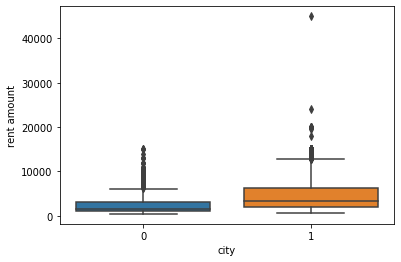

In [36]:
sns.boxplot(x ='city', y ='rent amount', data = df);

### 3.1.2. Animal

### ANALYSING ANIMAL FEATURE

In [37]:
df.animal.value_counts()

0    4666
1    1414
Name: animal, dtype: int64

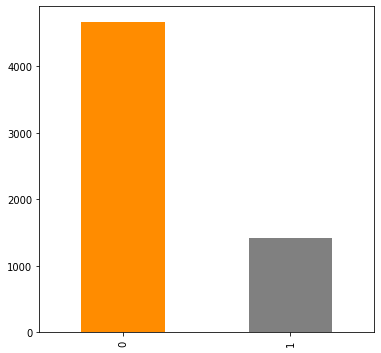

In [38]:
df["animal"].value_counts().plot(kind="bar", figsize=(6, 6), color=["darkorange", "grey"]);

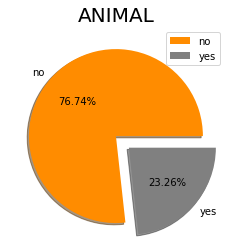

In [39]:
size = [4666,1414]
labels = ['no', 'yes']
colors = ['darkorange', 'grey']
explode = [0, 0.2]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('ANIMAL', fontsize = 20)
plt.legend()
plt.show()

**OBSERVATION**:
- 23.26% of the apartments allow pets
- 76.74% Don't allow pets

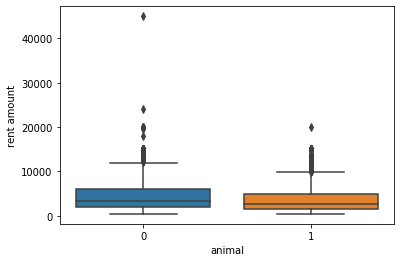

In [40]:
sns.boxplot(x ='animal', y ='rent amount', data = df);

### 3.1.3. Furniture

### ANALYSING FURNITURE FEATURE

In [41]:
df.furniture.value_counts()

1    4498
0    1582
Name: furniture, dtype: int64

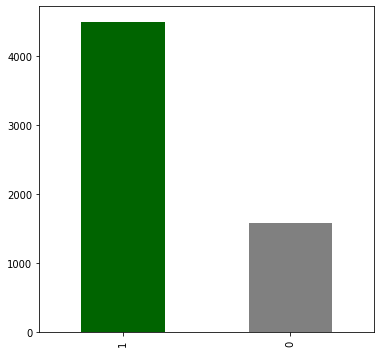

In [42]:
df["furniture"].value_counts().plot(kind="bar", figsize=(6, 6), color=["darkgreen", "grey"]);

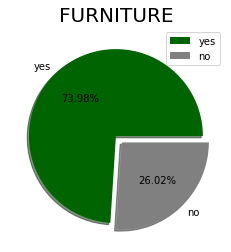

In [43]:
size = [4498,1582]
labels = ['yes', 'no']
colors = ['darkgreen', 'grey']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('FURNITURE', fontsize = 20)
plt.legend()
plt.show()

**OBSERVATION**:
- 73.98% of the apartments have furniture
- 26.02% don't have furniture

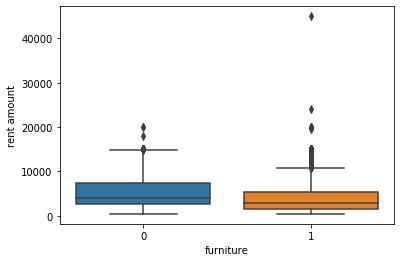

In [44]:
sns.boxplot(x ='furniture', y ='rent amount', data = df);

### 3.2. Building Features

In [45]:
df_building = df[["rooms", "bathroom", "parking spaces", "floor"]]

### 3.2.1. Rooms

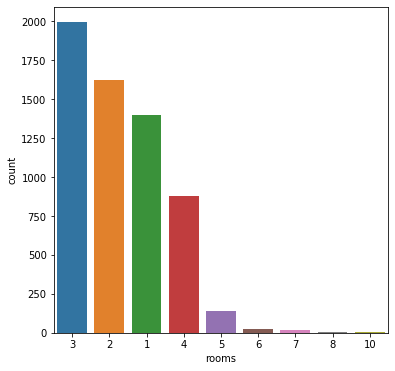

In [46]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(df.rooms, order=df.rooms.value_counts().keys(), ax =ax);

**OBSERVATION**:
    Majority of the apartments contain 3 rooms.

- ### Rooms vs Rent Amount

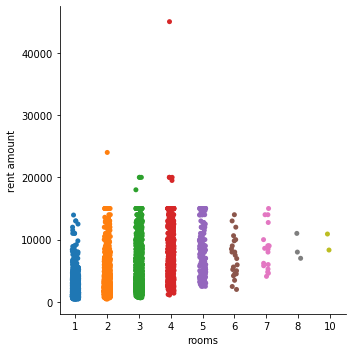

In [47]:
sns.catplot(x ='rooms', y ='rent amount', data = df);

### 3.2.2. Bathrooms

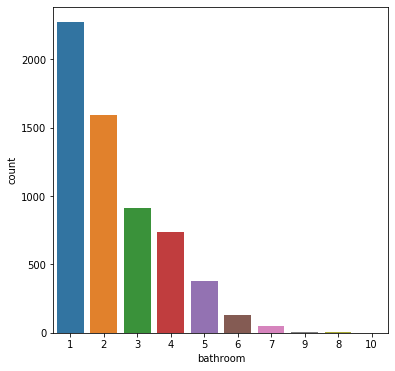

In [48]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.countplot(df.bathroom, order=df.bathroom.value_counts().keys(), ax =ax);

**OBSERVATION**:
    Majority of the apartments contain 1 bathroom.

- ### Bathrooms vs Rent Amount

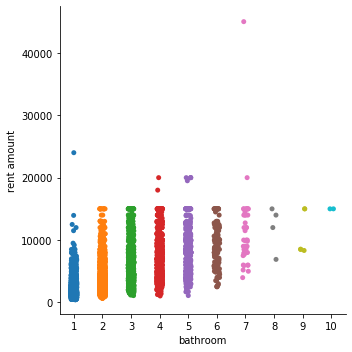

In [49]:
sns.catplot(x ='bathroom', y ='rent amount', data = df);

### 3.2.3. Parking Spaces

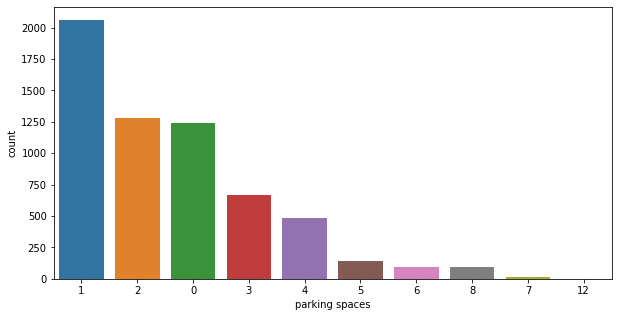

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(df["parking spaces"], order=df["parking spaces"].value_counts().keys(), ax =ax);

**OBSERVATION**:
    Majority of the apartments contain 1 parking space.

- ### Parking Space vs Rent Amount

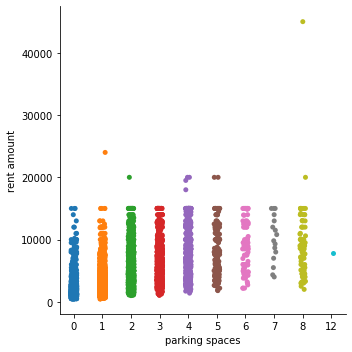

In [51]:
sns.catplot(x ='parking spaces', y ='rent amount', data = df);

### 3.2.4. Floor

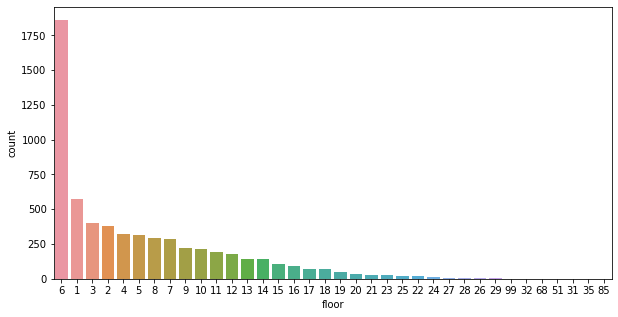

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(df.floor, order=df.floor.value_counts().keys(), ax =ax);

**OBSERVATION**:
    Majority of the apartments contain 6 floors.

- ### Floor vs Rent Amount

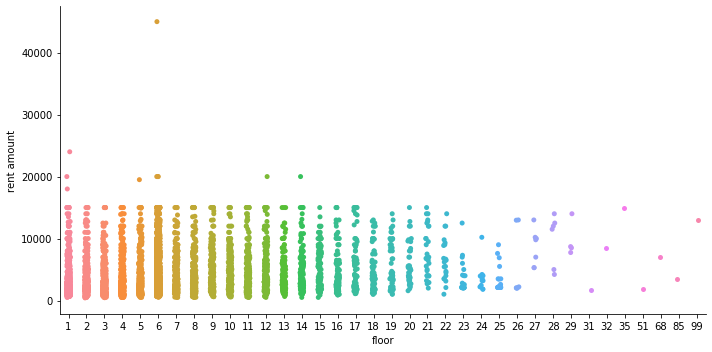

In [53]:
sns.catplot(x ='floor', y ='rent amount', data = df, height=5, aspect=2);

### 3.3. Rent Amount

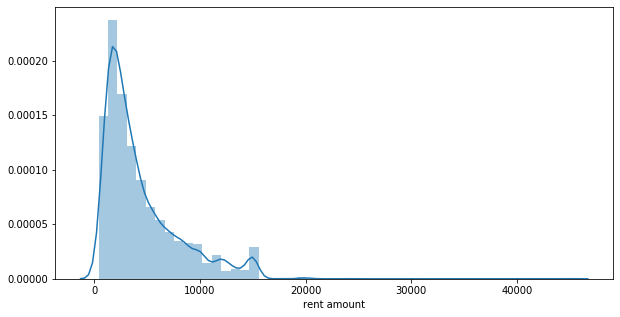

In [54]:
plt.figure(figsize=(10,5))
sns.distplot(df["rent amount"])
plt.show()

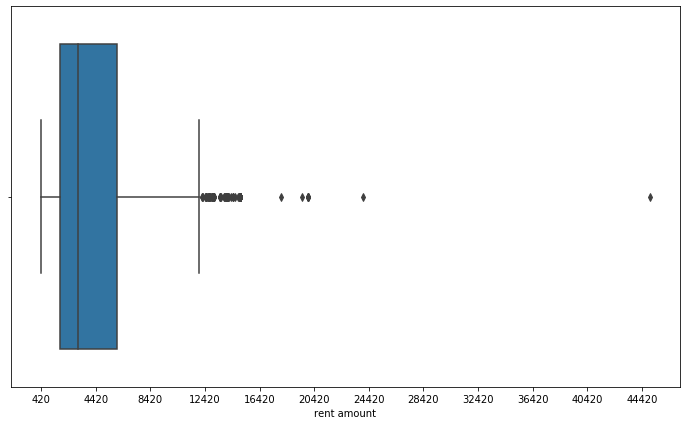

In [55]:
plt.figure(figsize=(12, 7))

sns.boxplot(df['rent amount'])
plt.xticks(np.arange(df['rent amount'].min(), df['rent amount'].max(), step=4000))

plt.show()

**OBSERVATION**: 
- The data is right skewed
- The minimum is 420
- There are outliers

In [56]:
df.shape

(6080, 13)

- ### Removing Outliers 

In [57]:
q1 = df["rent amount"].quantile(0.25)
q3 = df["rent amount"].quantile(0.75)

IQR = q3 - q1
IF = q1 - (1.5 * IQR)
OF = q3 + (1.5 * IQR)

In [58]:
df = df[~((df["rent amount"] < IF) | (df["rent amount"] > OF))]
df.shape

(5779, 13)

# 4. Building Model

Predictor the rent amount of apartments found in Brazil based on the following features:
- city
- area
- rooms
- bathrooms
- parking spaces
- floor
- animal
- furniture

In [59]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa', 'rent amount', 'property tax',
       'fire insurance', 'total'],
      dtype='object')

In [60]:
df_model = df[["city", 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture', 'rent amount']]
df_model.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,6,0,0,8000
1,0,64,2,1,1,10,0,1,820
2,1,443,5,5,4,3,0,0,7000
3,1,73,2,2,1,12,0,1,1250
4,1,19,1,1,0,6,1,1,1200


In [61]:
X = df_model.drop("rent amount", axis=1)
y = df_model["rent amount"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=2)

## 4.1. DecisionTreeRegressor

In [62]:
reg_dt = DecisionTreeRegressor()
reg_dt.fit(X_train, y_train)

y_pred = reg_dt.predict(X_test)

In [63]:
# Evaluation Metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.1720744491494921
Mean Absolute Error: 1646.5461946454163
Mean Squared Error: 6170646.043281106


## 4.2. Random Forest Regressor

In [64]:
reg_rf = RandomForestRegressor(n_estimators=10)
reg_rf.fit(X_train, y_train)

y_pred = reg_rf.predict(X_test)

In [65]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.48648054806282437
Mean Absolute Error: 1352.1741233357054
Mean Squared Error: 3827332.990253578


## 4.3. Linear Regression

In [66]:
reg_lr = LinearRegression()
reg_lr.fit(X_train, y_train)

y_pred = reg_lr.predict(X_test)

In [67]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.5230908634358982
Mean Absolute Error: 1367.180774111134
Mean Squared Error: 3554471.1399724027


## 4.4. Ridge

In [68]:
reg_ridge = Ridge()
reg_ridge.fit(X_train, y_train)

y_pred = reg_ridge.predict(X_test)

In [69]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.5230811634929173
Mean Absolute Error: 1367.1985155145785
Mean Squared Error: 3554543.435017184


**OBSERVATION**:
The best performing model is Linear Regression with the highest r_score and lowest mean absolute error and mean squared error.

# 5. SAVE MODEL

In [71]:
filename = "Brazil_Rent_Predator.pkl"
pickle.dump(reg_lr, open(filename, 'wb'))

In [73]:
# load model 
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test, y_test)
print(result)

0.5230908634358982
